**Disease under Study:  "Huntington's Disease"**   
**Brain Region under Study: "Basal Ganglia"**  


Data processing

In [ ]:
# import necessary modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

from tqdm import tqdm
from scipy import stats 

In [ ]:
try:
    # Executes if running in Google Colab
    from google.colab import drive
    drive.mount('gdrive/')
    path = "gdrive/My Drive/" # Change path to location of data if necessary
except:
    # Executes if running locally (e.g. Anaconda)
    path = "./"


Drive already mounted at gdrive/; to attempt to forcibly remount, call drive.mount("gdrive/", force_remount=True).


In [ ]:
dat = pd.read_excel('/'.join((path,'HD_ICM_random200.xlsx')))
dat = dat.replace({'\'':''}, regex=True) 
dat= dat.rename(columns=lambda x:x.strip('\''))
dat.index += 1 


In [ ]:
rois = ['Caud_R','Caudate_tail_R','GP_R','NucAccumbens_R','Put_R','Caud_L','Caudate_tail_L','GP_L','NucAccumbens_L','Put_L']
info = ['Subject_ID', 'Gender', 'Age', 'Diagnosis']
columns = np.concatenate((info, rois), axis=0)
dat_n = dat[columns]


In [ ]:
hd = dat_n[dat_n.Diagnosis == 'HD']
control = dat_n[dat_n.Diagnosis == 'NORMAL']

hd_female = hd[hd.Gender == 'F']
hd_male = hd[hd.Gender == 'M']
control_male = control[control.Gender == 'M']
control_female = control[control.Gender == 'F']

Exploratory Data Analysis

In [ ]:
#determine the number of people in each age group
max = 76
min = 24
gap = 4

hist_hd_female, bin_edges = np.histogram(hd[hd.Gender == 'F']['Age'],bins=np.arange(min,max,gap))
hist_hd_male, bin_edges = np.histogram(hd[hd.Gender == 'M']['Age'],bins=np.arange(min,max,gap))
hist_control_female, bin_edges = np.histogram(control[control.Gender == 'F']['Age'],bins=np.arange(min,max,gap))
hist_control_male, bin_edges = np.histogram(control[control.Gender == 'M']['Age'],bins=np.arange(min,max,gap))

AgeGroup = [] 
for i in bin_edges:
    if i == max - gap: break
    AgeGroup.append(str(i)+ '-' +str(i+gap))

#create a dataframe for plotting
gender_diagnosis = {'AgeGroup':AgeGroup,
     'HD_Female':hist_hd_female,
     'HD_Male':hist_hd_male,
     'Control_Female':hist_control_female * -1,
     'Control_Male':hist_control_male *-1}
gender_diagnosis = pd.DataFrame(data=gender_diagnosis)
gender_diagnosis['HD_Tot'] = gender_diagnosis['HD_Male'] + gender_diagnosis['HD_Female']
gender_diagnosis['Control_Tot'] = gender_diagnosis['Control_Male'] + gender_diagnosis['Control_Female'] 

gender_diagnosis_rev = gender_diagnosis[::-1] #for plotting


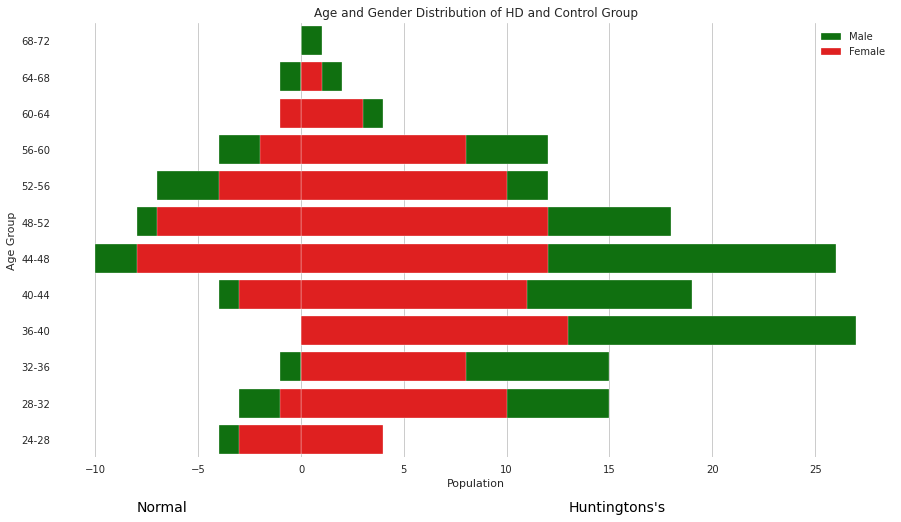

In [ ]:
sns.set_style("white")
plt.figure(figsize=(15,8))

bar_plot = sns.barplot(x="HD_Tot",y="AgeGroup", color="green", label="Male",data = gender_diagnosis_rev)
bar_plot = sns.barplot(x="Control_Tot",y="AgeGroup", color="green", data = gender_diagnosis_rev)
bar_plot = sns.barplot(x="HD_Female",y="AgeGroup", color='red', label="Female",data = gender_diagnosis_rev)
bar_plot = sns.barplot(x="Control_Female",y="AgeGroup", color="red", data = gender_diagnosis_rev)

# Labels 
bar_plot.set(xlabel="Population", ylabel="Age Group", title = "Age and Gender Distribution of HD and Control Group");
bar_plot.xaxis.grid(True)
plt.text(-8,13,'Normal',fontdict={'size':'14','color':'black'})
plt.text(13,13,"Huntingtons's",fontdict={'size':'14','color':'black'})
plt.legend();


Number of HD patients: 157
Number of Normal patients: 43


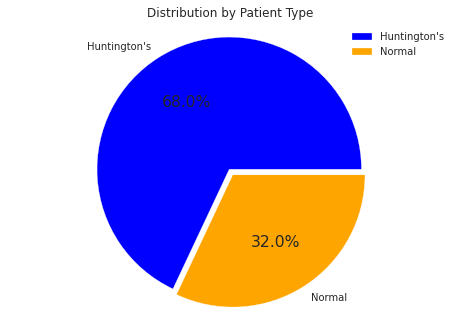

In [ ]:
# Distribution for HD & control group

print("Number of HD patients:", len(hd)) 
print("Number of Normal patients:", len(control))

labels = "Huntington's", "Normal"
sizes = [68, 32]

explode = (0, 0.05)

plt.pie(sizes, explode = explode, labels = labels, colors = ['blue','orange'], autopct ='%1.1f%%')
plt.title('Distribution by Patient Type')

plt.axis('equal')
plt.legend()
plt.show()

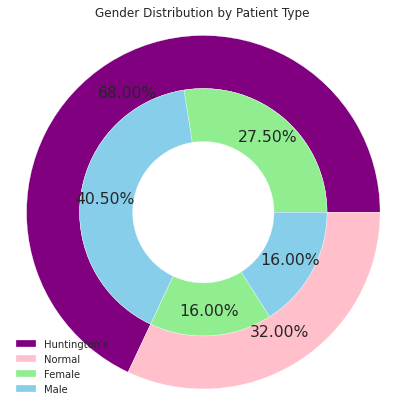

In [ ]:
# Gender Distribution
size = 0.3
vals = np.array([[55.,81.],[32.,32.]])

plt.figure(figsize=(7,7),dpi=72)
plt.pie(vals.sum(axis=1),radius=1,wedgeprops=dict(width=size,edgecolor='w'), colors= ['purple','pink'],autopct='%.2f%%',pctdistance=0.8)

labels = "Huntington's", "Normal","Female", "Male"
plt.pie(vals.flatten(),radius=1-size,wedgeprops=dict(width=size,edgecolor='w'),colors= ['lightgreen','skyblue'],autopct='%.2f%%',pctdistance=0.8)


plt.axis('equal')
plt.legend(labels=labels)
plt.title('Gender Distribution by Patient Type')
plt.show()

Number of HD females: 92
Number of HD males: 65


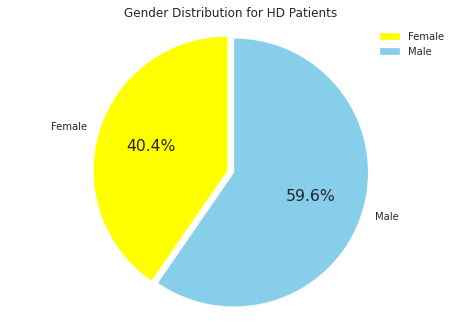

Number of control females: 29
Number of control males: 14


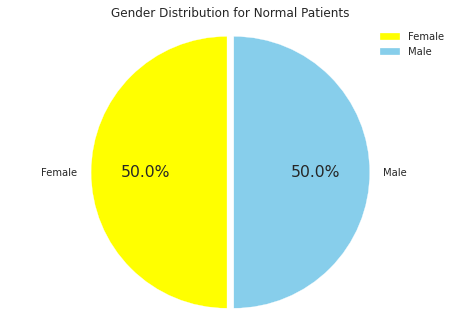

In [ ]:
#plot1: Gender Distribution for HD Patients
fig1,ax1 = plt.subplots()

print("Number of HD females:", len(hd_female)) 
print("Number of HD males:", len(hd_male)) 

labels = "Female", "Male"

sizes = [40.4, 59.6]

explode = (0, 0.05)

plt.pie(sizes, explode = explode,colors = ['yellow','skyblue'], labels=labels,autopct ='%1.1f%%', startangle = 90)
plt.title('Gender Distribution for HD Patients')

plt.axis('equal')
plt.legend()
plt.show()


#plot2: Gender Distribution for Normal Patients
fig2,ax2 = plt.subplots()


print("Number of control females:", len(control_female)) 
print("Number of control males:", len(control_male))

labels = "Female", "Male"

sizes = [50, 50]

explode = (0, 0.05)

plt.pie(sizes, explode = explode, colors = ['yellow','skyblue'], autopct ='%1.1f%%',labels=labels, startangle = 90)
plt.title('Gender Distribution for Normal Patients')

plt.axis('equal')
plt.legend()
plt.show()

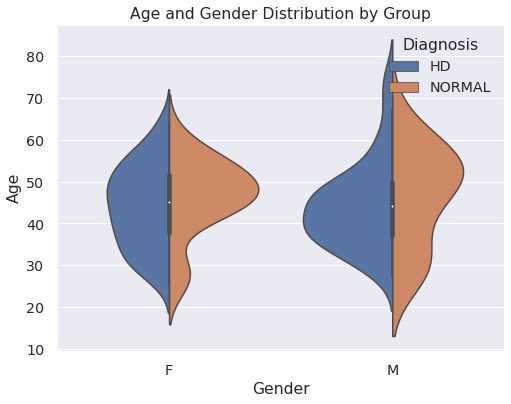

In [ ]:
# Violin Plot - Gender & Age Distribution
plt.figure(figsize=(8,6),dpi=72)
sns.set(font_scale=1.3)
sns.violinplot(x = "Gender",y = "Age", hue = "Diagnosis",data=dat,split=True)
plt.title('Age and Gender Distribution by Group');


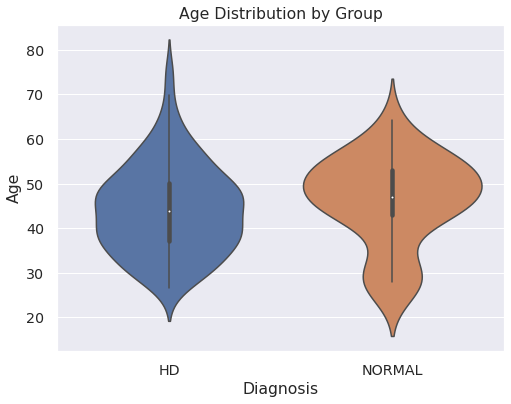

In [ ]:
# Violin Plot - Age & Group Distribution
plt.figure(figsize=(8,6),dpi=72)
sns.set(font_scale=1.3)
sns.violinplot(x = "Diagnosis",y = "Age", data=dat)
plt.title('Age Distribution by Group');

In [ ]:

# split patient info and volume data
hd_info = hd[info]
hd_volume = hd[rois]
control_info = control[info]
control_volume = control[rois]

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

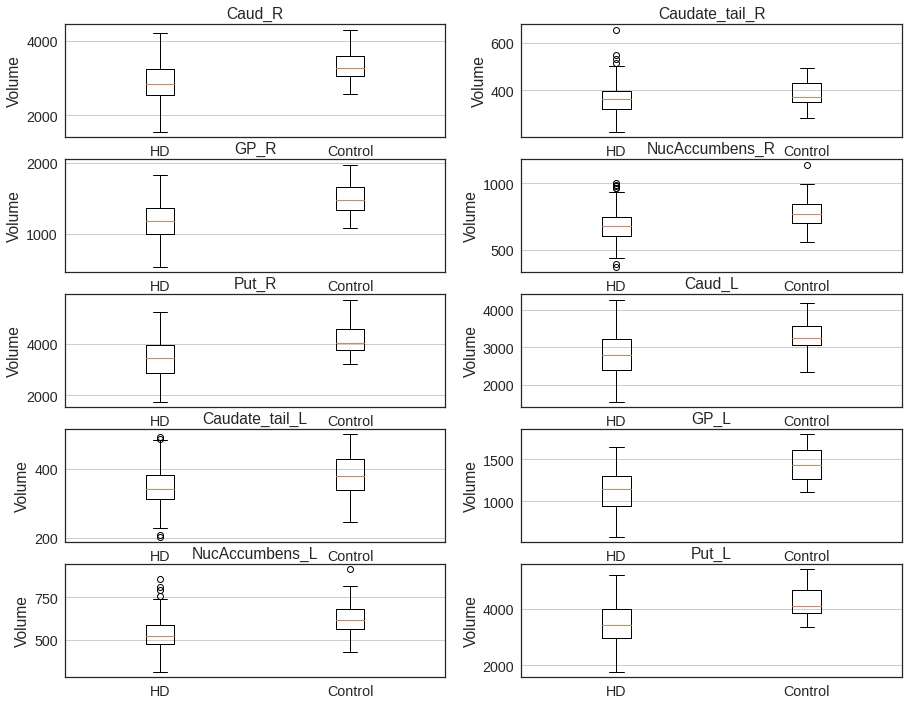

In [ ]:
plt.style.use('seaborn-white')
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 12))

#plot box plot
for i in range(0,10):
    compare = [hd_volume.iloc[:,i],control_volume.iloc[:,i]] #collect data from HD and control group
    axes[i//2,i%2].boxplot(compare)#loop and plot
    axes[i//2,i%2].set_title(control_volume.columns[i])
    axes[i//2,i%2].set_ylabel('Volume')
    axes[i//2,i%2].yaxis.grid(True) #add horizontal grid line

# add x-tick labels
plt.setp(axes, xticks=[1,2],
         xticklabels=['HD', 'Control'])


plt.show()

Statistics

In [ ]:
# create new df with mean and standard deviation for control
control_mean = control_volume.mean()
control_std = control_volume.std()
control_mean_std = pd.DataFrame({'control_mean':control_mean, 'control_std':control_std}).T
#control_mean_std
control_mean_std

,Caud_R,Caudate_tail_R,GP_R,NucAccumbens_R,Put_R,Caud_L,Caudate_tail_L,GP_L,NucAccumbens_L,Put_L
control_mean,3341.000000,386.558140,1506.930233,775.534884,4160.813953,3296.744186,381.162791,1434.837209,625.441860,4228.930233
control_std,424.187571,58.668683,219.623313,114.090054,527.748599,411.946893,57.941650,209.161356,102.361242,521.415354


In [ ]:
zscores_messy = pd.read_excel('/'.join((path,'HD_sorted.xlsx')))
zscores_messy = zscores_messy[zscores_messy.Value == 'z-score'] # only get z-score values
zscores_messy = zscores_messy.replace({'\'':''}, regex=True) # remove ' ' from data
zscores_messy = zscores_messy.rename(columns=lambda x:x.strip('\'')) # remove ' ' from column names
zscores_messy.Age = zscores_messy.Age.round(1) # round Age values
zscores = zscores_messy.replace({'Subject_':''}, regex=True).set_index('Subject_ID') # set index to patient number
zscores

,Gender,Age,Diagnosis,Value,Caud_R,Caudate_tail_R,GP_R,NucAccumbens_R,Put_R,Caud_L,Caudate_tail_L,GP_L,NucAccumbens_L,Put_L
Subject_ID,,,,,,,,,,,,,,
1,F,43.8,HD,z-score,0.414911,-0.844712,-0.773735,-0.425409,-0.496096,-0.317381,0.100743,-0.534693,-0.385320,-0.732488
3,M,41.6,HD,z-score,0.787388,4.592601,-0.368496,1.765843,-0.825798,-0.072204,0.963680,-0.692466,0.826076,-0.862902
4,F,58.3,HD,z-score,-2.411669,-0.401545,-2.991168,-1.880400,-3.122346,-2.349196,-0.900264,-3.020812,-1.967951,-2.987887
5,M,43.9,HD,z-score,-3.679976,-1.441282,-3.546665,-2.380005,-3.963656,-3.766855,-1.469803,-3.427197,-2.847190,-4.140519
6,F,37.4,HD,z-score,0.186238,-1.407193,-0.892119,0.372207,-0.573784,-0.344084,-1.055593,-0.434293,-0.219242,-0.454398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,F,41.3,NORMAL,z-score,0.497421,0.143890,0.123255,-0.215048,0.627545,0.558945,-0.296208,0.498002,-0.082471,0.663712
172,M,30.7,NORMAL,z-score,1.313098,-0.810622,0.574027,0.959462,0.788607,0.923070,0.238813,0.593622,0.054299,1.306194
174,F,61.6,NORMAL,z-score,-0.040077,-0.691308,-1.283699,-1.906695,-1.549628,-0.081914,-1.003817,-1.361806,-1.880027,-1.603195


In [ ]:
#zscore = pd.read_excel("data_w_zscores.xls")
#zscore

In [ ]:
# separate only the AD z-scores
hd_zscore = zscores[zscores.Diagnosis == 'HD'][rois]
hd_zscore = hd_zscore[['Caud_L', 'Caud_R', 'GP_L', 'GP_R','NucAccumbens_L','NucAccumbens_R', 'Put_L', 'Put_R', 'Caudate_tail_L', 'Caudate_tail_R']]
hd_zscore

,Caud_L,Caud_R,GP_L,GP_R,NucAccumbens_L,NucAccumbens_R,Put_L,Put_R,Caudate_tail_L,Caudate_tail_R
Subject_ID,,,,,,,,,,
1,-0.317381,0.414911,-0.534693,-0.773735,-0.385320,-0.425409,-0.732488,-0.496096,0.100743,-0.844712
3,-0.072204,0.787388,-0.692466,-0.368496,0.826076,1.765843,-0.862902,-0.825798,0.963680,4.592601
4,-2.349196,-2.411669,-3.020812,-2.991168,-1.967951,-1.880400,-2.987887,-3.122346,-0.900264,-0.401545
5,-3.766855,-3.679976,-3.427197,-3.546665,-2.847190,-2.380005,-4.140519,-3.963656,-1.469803,-1.441282
6,-0.344084,0.186238,-0.434293,-0.892119,-0.219242,0.372207,-0.454398,-0.573784,-1.055593,-1.407193
...,...,...,...,...,...,...,...,...,...,...
194,-0.183869,-0.226315,-1.505236,-1.060590,-0.785862,0.091727,0.437405,0.568805,-0.106362,0.706371
195,-1.540840,-1.419183,-2.208043,-2.176136,-1.557639,-1.144139,-2.318555,-2.574737,-1.003817,-1.236744
196,-1.312655,-1.195226,-1.605637,-1.292806,-1.059404,-0.705889,-1.752787,-1.915332,-0.175397,-0.026558


In [ ]:
# separate only the control z-scores
control_zscore = zscores[zscores.Diagnosis == 'NORMAL'][rois]
control_zscore= control_zscore[['Caud_L', 'Caud_R', 'GP_L', 'GP_R','NucAccumbens_L','NucAccumbens_R', 'Put_L', 'Put_R', 'Caudate_tail_L', 'Caudate_tail_R']]
control_zscore

,Caud_L,Caud_R,GP_L,GP_R,NucAccumbens_L,NucAccumbens_R,Put_L,Put_R,Caudate_tail_L,Caudate_tail_R
Subject_ID,,,,,,,,,,
2,-0.929111,-0.888758,-0.386483,-0.172706,0.503688,0.223202,-0.368095,0.040144,-0.900264,1.217717
29,0.114713,0.268749,0.019902,-0.596158,-0.356012,0.310852,-0.281791,-0.299032,-0.089103,0.229115
30,-0.822301,-0.820392,-0.869363,-0.873906,-0.629553,-0.346523,-0.734405,-0.323665,0.911904,0.876820
32,-0.669368,-0.134375,1.449421,0.760711,1.431774,0.372207,1.064544,1.050095,-0.020068,-0.401545
34,1.415852,1.553558,0.440630,0.464749,0.015222,-0.197518,1.020434,1.048200,0.946421,0.518878
35,-0.142601,-0.110800,-0.625532,-0.286537,-0.414628,0.705277,0.161234,-0.266820,0.204295,-0.333366
38,-0.203289,-0.799175,-1.347463,-1.725364,-1.401330,-1.231789,-0.855230,-0.848537,-1.366250,-0.486770
45,2.156239,2.272580,0.856577,0.856329,2.809248,3.203304,2.234437,3.003676,-0.192656,-0.418590
47,0.779848,0.655370,1.071722,0.938287,0.435303,0.126787,1.423184,1.271791,1.377890,0.570012


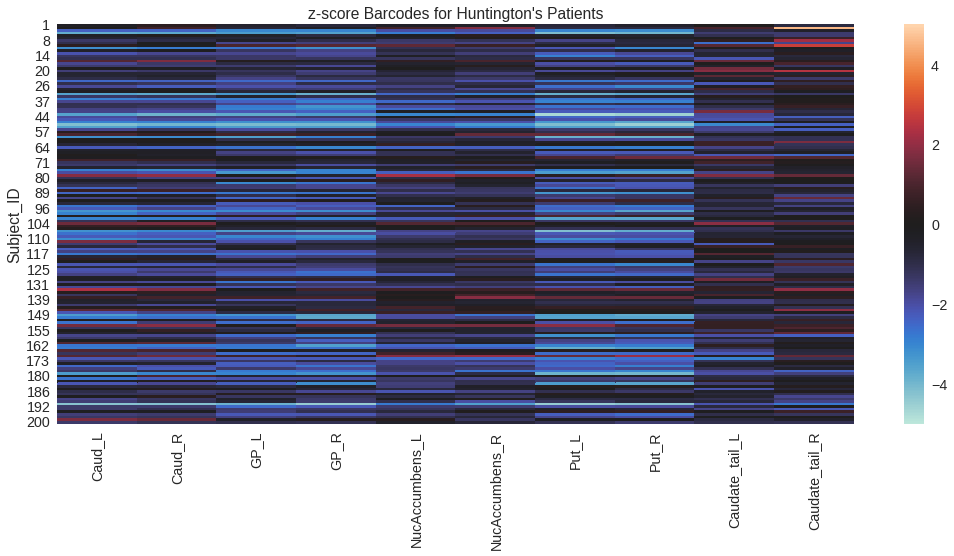

In [ ]:
# heat map for all Hunington's patients
plt.figure(figsize=(15,8))
ax1 = sns.heatmap(hd_zscore, vmin=-5, vmax=5, center=0)
ax1.set(title = "z-score Barcodes for Huntington's Patients");
plt.tight_layout()
plt.savefig('HD_zscore.png',dpi=300, bbox_inches= "tight")

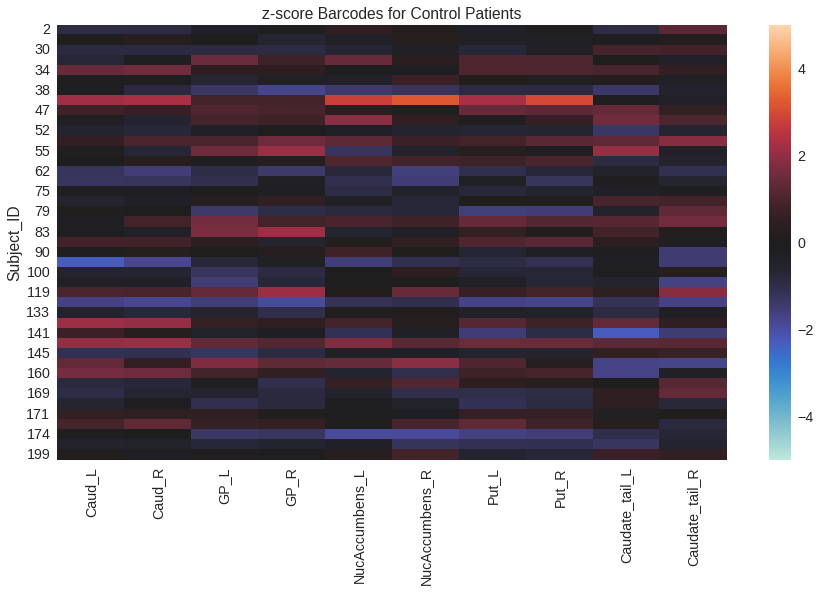

In [ ]:
# heat map for all control patients
plt.figure(figsize=(15,8))
ax2 = sns.heatmap(control_zscore, vmin=-5, vmax=5, center=0)
ax2.set(title = "z-score Barcodes for Control Patients");

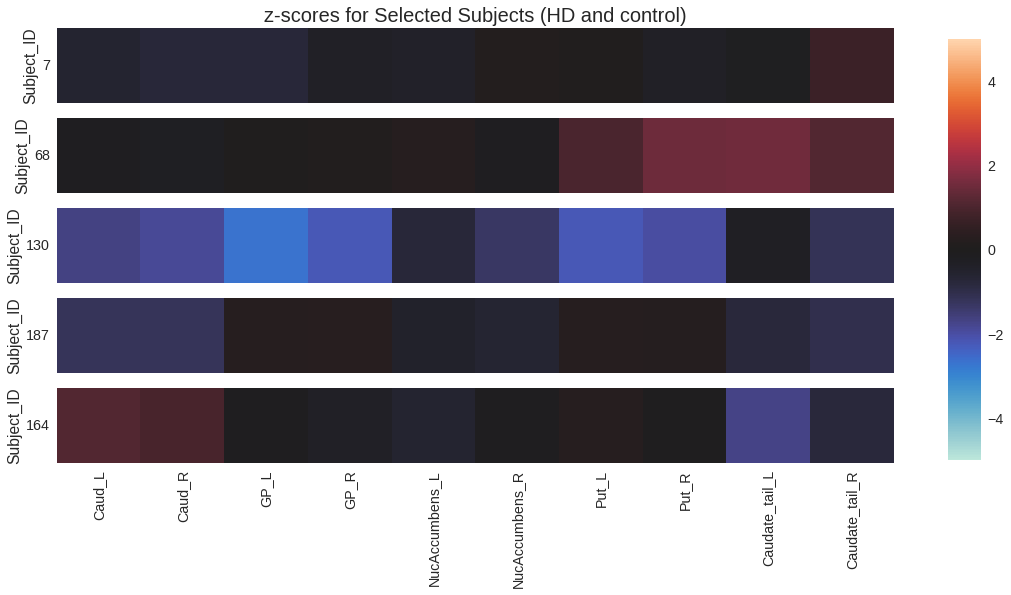

In [ ]:
# some of the heat maps
fig, axn = plt.subplots(5,1, figsize=(15,8))
cbar_ax = fig.add_axes([0.95, 0.13, 0.03, .73])

plt.subplot(5,1,1)
sns.heatmap(hd_zscore.iloc[5:6], xticklabels= False, vmin=-5, vmax=5, center=0, cbar=False)
plt.yticks(rotation=0)
plt.title('z-scores for Selected Subjects (HD and control)', fontsize=20);

plt.subplot(5,1,2)
sns.heatmap(hd_zscore.iloc[52:53], xticklabels= False, vmin=-5, vmax=5, center=0, cbar=False)
plt.yticks(rotation=0)

plt.subplot(5,1,3)
sns.heatmap(hd_zscore.iloc[101:102], xticklabels= False, vmin=-5, vmax=5, center=0, cbar=False)
plt.yticks(rotation=0)

plt.subplot(5,1,4)
sns.heatmap(hd_zscore.iloc[145:146], xticklabels= False, vmin=-5, vmax=5, center=0, cbar=False)
plt.yticks(rotation=0)

plt.subplot(5,1,5)
sns.heatmap(hd_zscore.iloc[128:129], vmin=-5, vmax=5, center=0, cbar_ax=cbar_ax)
plt.yticks(rotation=0);


In [ ]:
# sort by age
age_sorted_zscores_messy = zscores_messy.sort_values(by=['Age']).set_index('Age').dropna() # set index to Age
age_sorted_zscores = age_sorted_zscores_messy[rois]

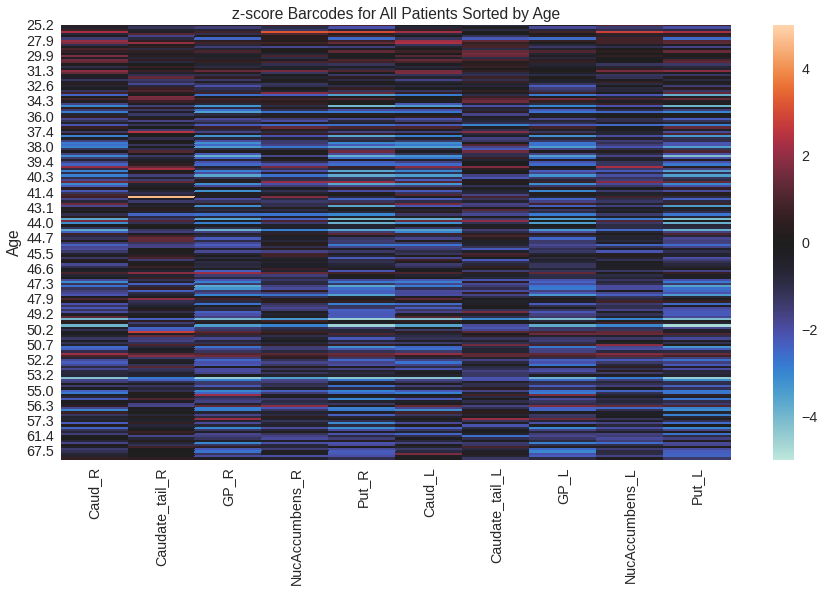

In [ ]:
# heat map for all patients sorted by age
plt.figure(figsize=(15,8))
ax2 = sns.heatmap(age_sorted_zscores, vmin=-5, vmax=5, center=0)
ax2.set(title = "z-score Barcodes for All Patients Sorted by Age");

In [ ]:
# sort HD group by age
age_sorted_zscores_hd = age_sorted_zscores_messy[age_sorted_zscores_messy.Diagnosis == 'HD'][rois]

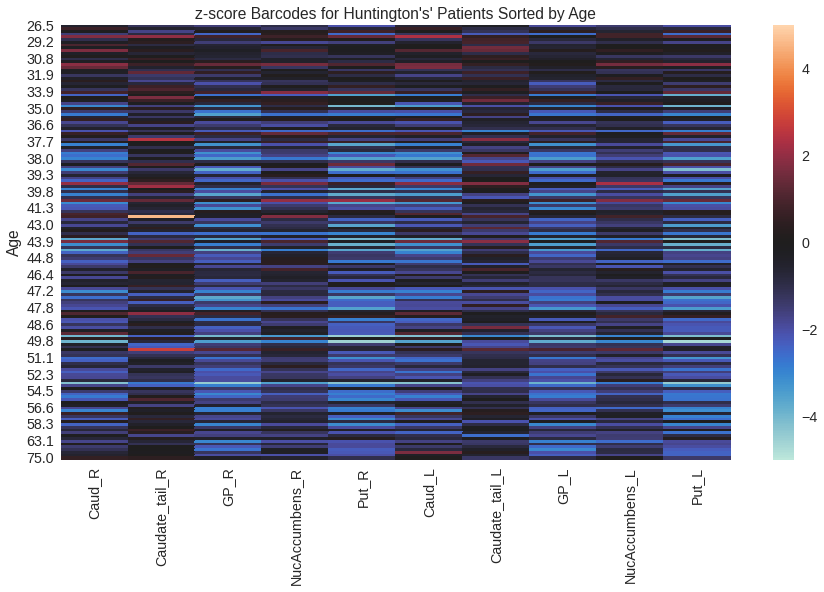

In [ ]:
# heat map for HD patients sorted by age
plt.figure(figsize=(15,8))
ax2 = sns.heatmap(age_sorted_zscores_hd, vmin=-5, vmax=5, center=0)
ax2.set(title = "z-score Barcodes for Huntington\'s' Patients Sorted by Age");

In [ ]:
# sort control group by age
age_sorted_zscores_control = age_sorted_zscores_messy[age_sorted_zscores_messy.Diagnosis == 'NORMAL'][rois]

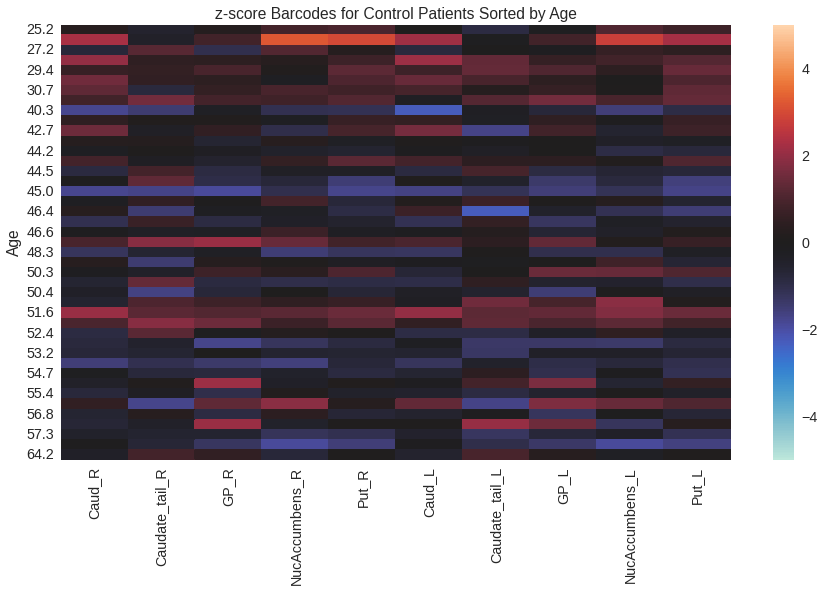

In [ ]:
# heat map for all patients sorted by age
plt.figure(figsize=(15,8))
ax2 = sns.heatmap(age_sorted_zscores_control, vmin=-5, vmax=5, center=0)
ax2.set(title = "z-score Barcodes for Control Patients Sorted by Age");

Hypothesis 1: Basal Ganglia volume will decrease in the ROIs for the Hunington’s patients (t-test)

In [ ]:
# t-test for volumes from HD data (HD vs. Control)
(statistics, pvalues) = stats.ttest_ind(hd_volume,control_volume) 


Null Hypothesis: There is no difference in the mean volume for each region of the brain in Basal Ganglia between the control group and the Hunington's group.

In [ ]:
# add p-values to Dataframe with corresponding brain region and sort
df_pvals = pd.DataFrame({'p-values': pvalues}, index=rois)
df_pvals_sorted = df_pvals.sort_values(by=['p-values'])
rois_sorted = df_pvals_sorted.index # also sort lables
df_pvals_sorted

,p-values
GP_L,1.954033e-13
GP_R,6.428705e-13
Put_L,1.592921e-10
Put_R,7.590674e-10
NucAccumbens_L,1.140611e-07
Caud_L,4.701469e-07
Caud_R,1.327808e-06
NucAccumbens_R,1.128620e-05
Caudate_tail_L,9.122579e-04
Caudate_tail_R,5.334633e-02


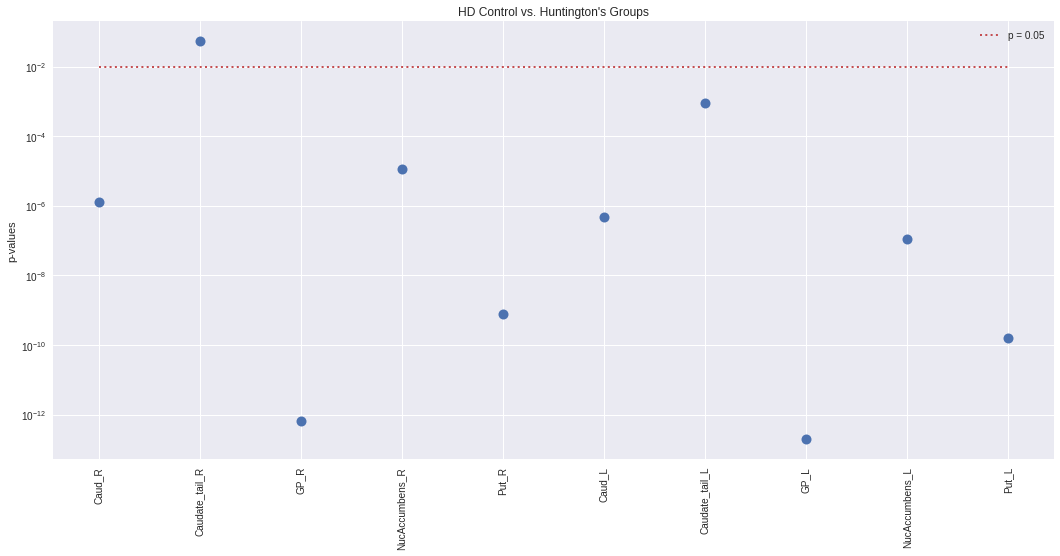

In [ ]:
# plot p-values for each brain region
plt.figure(figsize=(15,8))
plt.style.use('seaborn')
plt.plot(df_pvals['p-values'],'.', label='_nolegend_', markersize=20)
plt.plot(np.arange(df_pvals.shape[0]), np.full(df_pvals.shape[0],0.01), 'r:', linewidth=2)
plt.xticks(rotation='vertical')
plt.ylabel('p-values')
plt.legend(['p = 0.05'], loc='upper right')
ax = plt.gca()
ax.set_yscale('log')
plt.title('HD Control vs. Huntington\'s Groups');
plt.tight_layout()
plt.savefig('hd_vs_ctrl_pvalues.png',dpi=300, bbox_inches= "tight")

In [ ]:
full_rois = ['Right Caudate Nuclues','Right Caudate Tail','Right Globus Pallidus','Right Nucleus Accumbens','Right Putamen','Left Caudate Nucleus','Left Caudate Tail','Left Globus Pallidus','Left Nuclues Accumbens','Left Putamen']

In [ ]:
# print if result is or isn't significant
for i in range(10):
    if pvalues[i] < 0.01:
        print(f'There is difference between the mean volume of the {full_rois[i]} ({rois[i]}) in the control group and Huntington\'s group in the HD dataset.\n')
    else:
        print(f'There is a NOT much difference between the mean volume of the {full_rois[i]} ({rois[i]}) in the control group and Huntington\'s group in the HD dataset.\n')

There is difference between the mean volume of the Right Caudate Nuclues (Caud_R) in the control group and Huntington's group in the HD dataset.

There is a NOT much difference between the mean volume of the Right Caudate Tail (Caudate_tail_R) in the control group and Huntington's group in the HD dataset.

There is difference between the mean volume of the Right Globus Pallidus (GP_R) in the control group and Huntington's group in the HD dataset.

There is difference between the mean volume of the Right Nucleus Accumbens (NucAccumbens_R) in the control group and Huntington's group in the HD dataset.

There is difference between the mean volume of the Right Putamen (Put_R) in the control group and Huntington's group in the HD dataset.

There is difference between the mean volume of the Left Caudate Nucleus (Caud_L) in the control group and Huntington's group in the HD dataset.

There is difference between the mean volume of the Left Caudate Tail (Caudate_tail_L) in the control group and

Since p-values are less than threshold, we reject the null hypothesis. Thus, Basal Ganglia volume will decrease in the ROIs for the Huntington’s patients


**Linear Regression**  
H0: Basal Ganglia brain volume will not decrease in the ROIs as the age of the patient increases. 

H1: Basal Ganglia brain volume will decrease in the ROIs as the age of the patient increases. 

In [ ]:
#create a dataframe for this section
dat_h_age = dat_n.copy()
dat_h_age['Total_Basal Ganglia'] = dat_h_age[rois].sum(axis=1)

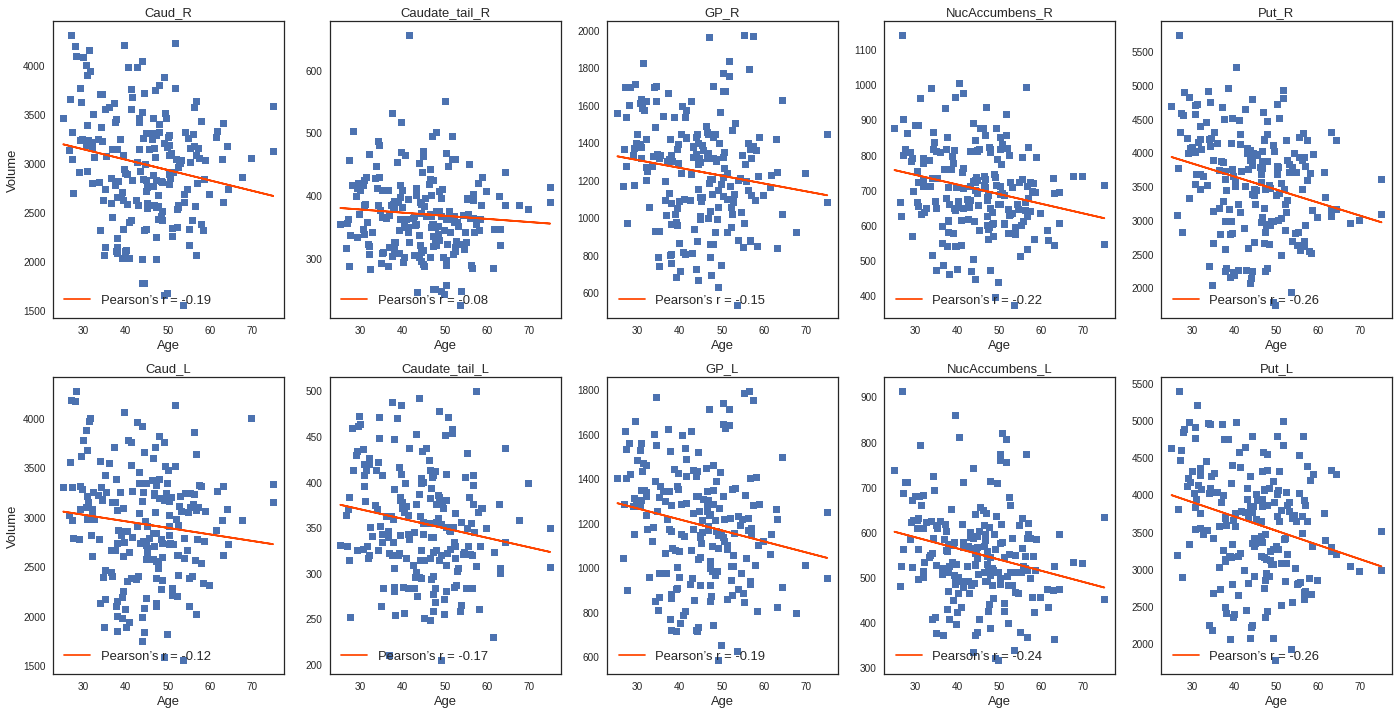

<Figure size 576x396 with 0 Axes>

In [ ]:
#Linear Regression

plt.style.use('seaborn-white')
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(24, 12))

for i in range(0,10):
    slope, intercept, r, p, stderr = scipy.stats.linregress(dat_h_age['Age'], dat_h_age[rois[i]])
    #line = f'r={r:.2f}'
    line = f'Pearson’s r = {r:.2f}'
    axes[i//5,i%5].plot(dat_h_age['Age'], dat_h_age[rois[i]], linewidth=0, marker='s')
    axes[i//5,i%5].plot(dat_h_age['Age'], intercept + slope * dat_h_age['Age'],label=line, color='orangered')
    axes[i//5,i%5].set_xlabel('Age', fontsize=13)
    axes[i//5,i%1].set_ylabel('Volume', fontsize=13)
    axes[i//5,i%5].set_title(rois[i], fontsize=13)
    axes[i//5,i%5].legend(shadow=True,framealpha=0, facecolor='white',loc='lower left', fontsize=13 )

plt.show()
plt.tight_layout()
plt.savefig('nuclei_vs_Age.png',dpi=300, bbox_inches= "tight")

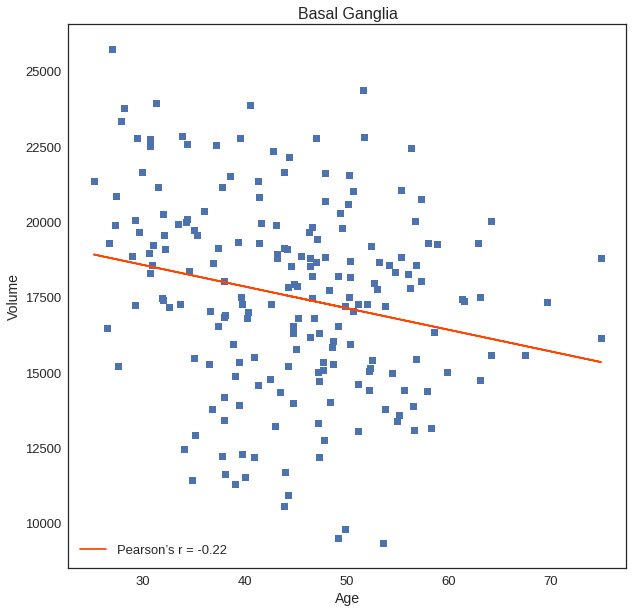

In [ ]:
#Linear Regression (Basal Ganglia vs. Age)

slope, intercept, r, p, stderr = scipy.stats.linregress(dat_h_age['Age'], dat_h_age['Total_Basal Ganglia'])
line = f'Pearson’s r = {r:.2f}'

fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(dat_h_age['Age'], dat_h_age['Total_Basal Ganglia'], linewidth=0, marker='s')
ax.plot(dat_h_age['Age'], intercept + slope * dat_h_age['Age'], label=line, color='orangered')
ax.set_xlabel('Age', fontsize=14)
ax.set_ylabel('Volume', fontsize=14)
ax.set_title('Basal Ganglia', fontsize=16)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
ax.legend(facecolor='white',loc='lower left', shadow= True, fontsize=13)

plt.show()

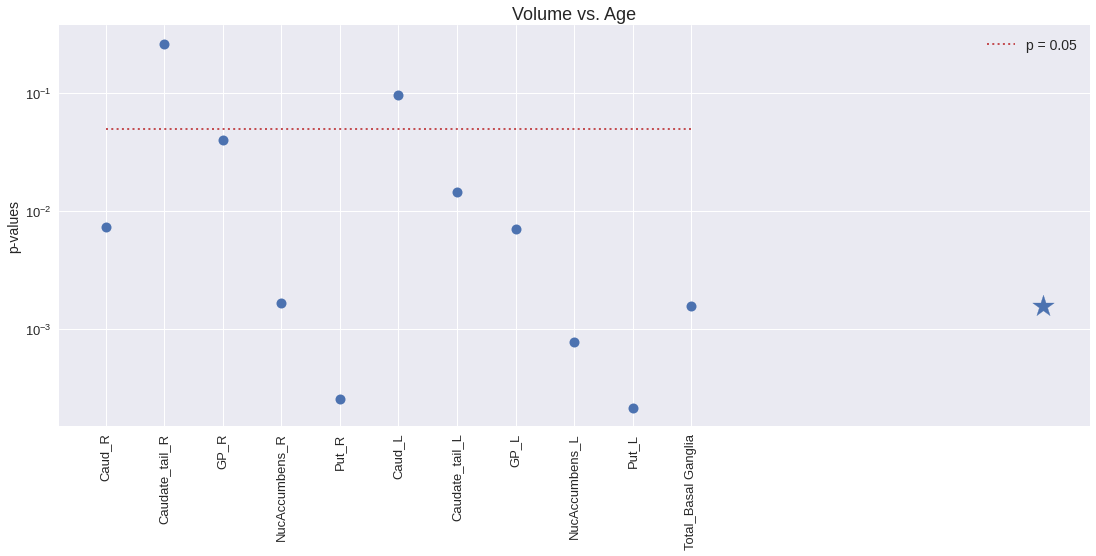

In [ ]:
# plot p-values

rois_h_age = rois.copy()
rois_h_age.append('Total_Basal Ganglia')

list_pvalue = [] #create a list of p-values
for area in rois_h_age:
    (r, p) = scipy.stats.pearsonr(dat_h_age['Age'], dat_h_age[area])
    list_pvalue.append(p)
df_h_age = pd.DataFrame({'p-values': list_pvalue}, index=rois_h_age)

plt.style.use('seaborn')
plt.figure(figsize=(15.5,8))
plt.plot(df_h_age['p-values'],'.', label='_nolegend_',markersize = 20)
plt.scatter(16,df_h_age.loc['Total_Basal Ganglia'],s = 2*2**8, marker='*') #mark the Total one
plt.plot(np.arange(df_h_age.shape[0]), np.full(df_h_age.shape[0],0.05), 'r:', linewidth=2)
plt.xticks(rotation='vertical',fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel('p-values', fontsize=14)
plt.legend(['p = 0.05'], loc='upper right', fontsize=14)
ax = plt.gca()
ax.set_yscale('log')           
plt.title('Volume vs. Age',fontsize = 18)
plt.tight_layout()
plt.savefig('vol_vs_age_pvalues.png',dpi=300, bbox_inches= "tight")

Since the p-values are less than threshold we reject the null hyphothesis, hence the Basal Ganglia brain volume will decrease in the ROIs as the age of the patient increases.

In [ ]:

m_data = pd.read_excel('/'.join((path,'MRICloud_volume_rois.xlsx')),index_col=0)
m_data_zscore = (m_data - control_mean) / control_std

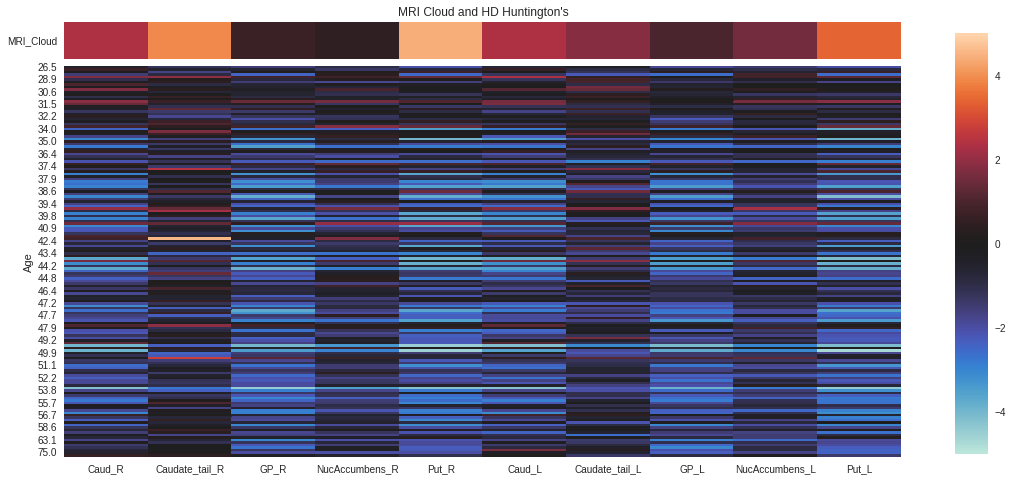

In [ ]:
fig, axn = plt.subplots(10,1, figsize=(15,8))
cbar_ax = fig.add_axes([0.95, 0.13, 0.03, .73])

plt.subplot(10,1,1)
sns.heatmap(m_data_zscore, xticklabels=False, vmin=-5, vmax=5, center=0, cbar=False)
plt.yticks(rotation=0)
plt.title('MRI Cloud and HD Huntington\'s');

plt.subplot(10,1,(2,10))
sns.heatmap(age_sorted_zscores_hd, vmin=-5, vmax=5, center=0, cbar_ax=cbar_ax)
plt.yticks(rotation=0);

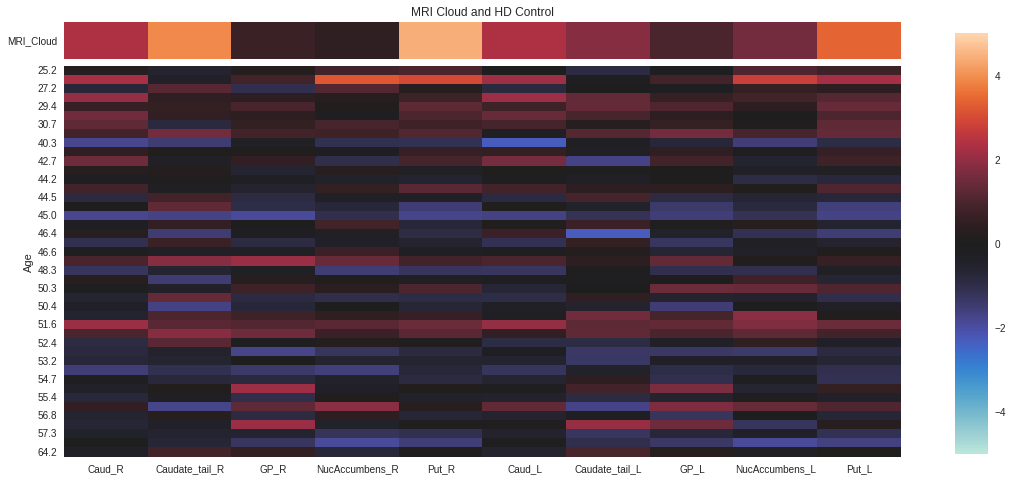

In [ ]:
fig, axn = plt.subplots(10,1, figsize=(15,8))
cbar_ax = fig.add_axes([0.95, 0.13, 0.03, .73])

plt.subplot(10,1,1)
sns.heatmap(m_data_zscore, xticklabels=False, vmin=-5, vmax=5, center=0, cbar=False)
plt.yticks(rotation=0)
plt.title('MRI Cloud and HD Control');

plt.subplot(10,1,(2,10))
sns.heatmap(age_sorted_zscores_control, vmin=-5, vmax=5, center=0, cbar_ax=cbar_ax)
plt.yticks(rotation=0);